## Import Required Libraries

In [1]:
#python libaries
import pandas as pd #read,write and manipulation of data frames 
import numpy as np #numerical operations
import matplotlib.pyplot as plt #basic visualization 
import seaborn as sb #statistical visualization
import nltk #natural language processing 
from bs4 import BeautifulSoup # html 
import re # regular expressions
#NLP libraries
from nltk.corpus import stopwords #stopwords
from nltk.stem import WordNetLemmatizer #lemmatization
from wordcloud import WordCloud, STOPWORDS #word cloud 
#machine learning libraries
from sklearn.model_selection import train_test_split #splitting  the dataset
from sklearn.feature_extraction.text import CountVectorizer #vectorizeration techniques
from sklearn.naive_bayes import MultinomialNB #multinomial naive bayes
from sklearn.svm import SVC # support vector classifier
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.model_selection import GridSearchCV #gridsearchcv
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report #evaluation of models
from sklearn.preprocessing import LabelEncoder #preprocessing 

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


## Loading Dataset 

In [2]:
df = pd.read_csv('amazonreviews.tsv',sep='\t')

In [3]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


## Exploratory Data Analysis

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
label     10000 non-null object
review    10000 non-null object
dtypes: object(2)
memory usage: 156.3+ KB


We can see that there are two columns(label,review) which are object datatype and Total entries are 10000

In [0]:
df.shape

(10000, 2)

There are 10000 rows and 2 columns.

In [0]:
df.describe()

,label,review
count,10000,10000
unique,2,10000
top,neg,"AWESOME!: Let's face it,Garbage's self-titled ..."
freq,5097,1


In label column, Total count is 10000 and unique classes are two (pos and neg).

In review column, Total count is 10000 and unique reviews were 10000.

In [0]:
df.isnull().sum()

label     0
review    0
dtype: int64

 there are no null values in the dataset 

In [0]:
df.label.value_counts() #unique items and frequency

neg    5097
pos    4903
Name: label, dtype: int64

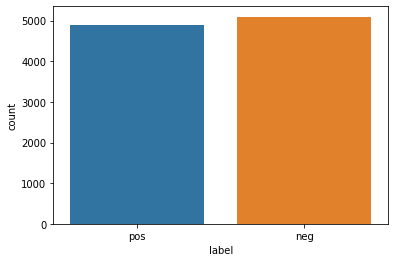

In [6]:
sb.countplot(x="label",data=df)

In [0]:
df.label.value_counts()/len(df)

neg    0.5097
pos    0.4903
Name: label, dtype: float64

we can see that dataset is balanced.

In [0]:
#checking for spaces and double spaces
blanks = []
for i,lb,rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)

In [0]:
blanks

[]

 there is no spaces in between text  in individual review.

## Text Preprocessing 

In [0]:
stopwords=nltk.corpus.stopwords.words("english")
lem = WordNetLemmatizer()

In [0]:
#cleaning HTML tags in data 
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [0]:
#data cleaning and removing stop words and applying stemming 
def clean_text(text):
    text=text.lower()
    text = strip_html(text)
    #pattern : '[^a-z\s] 
    text=re.sub('[^a-z\s]',"",text)
    words=text.split(" ") #words list 
    words_imp=[lem.lemmatize(word) for word in words if word not in stopwords]
    text_cleaned=" ".join(words_imp)
    return text_cleaned

In [8]:
df['review'].head()

0    Stuning even for the non-gamer: This sound tra...
1    The best soundtrack ever to anything.: I'm rea...
2    Amazing!: This soundtrack is my favorite music...
3    Excellent Soundtrack: I truly like this soundt...
4    Remember, Pull Your Jaw Off The Floor After He...
Name: review, dtype: object

In [0]:
df['review'] = df['review'].apply(clean_text) #applies for each row

In [10]:
df['label'].head()

0    pos
1    pos
2    pos
3    pos
4    pos
Name: label, dtype: object

In [12]:
df["label"]=df["label"].map({"pos":1,"neg":0})

In [15]:
df['label'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    0
7    1
8    1
9    1
Name: label, dtype: int64

## Splitting Dataset 

In [16]:
X = df.review
y=df.label

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
#without stratify 
#3000 => pos : 1800  neg: 1200


In [0]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(7000,) (7000,) (3000,) (3000,)


## Vectorization

In [0]:
count_vec = CountVectorizer() 

In [0]:
train_count_vec = count_vec.fit_transform(x_train)

In [0]:
test_count_vec = count_vec.transform(x_test)

In [0]:
train_count_vec

<7000x28384 sparse matrix of type '<class 'numpy.int64'>'
	with 243433 stored elements in Compressed Sparse Row format>

In [0]:
test_count_vec

<3000x28384 sparse matrix of type '<class 'numpy.int64'>'
	with 96677 stored elements in Compressed Sparse Row format>

# Model Building 

##  MultiNomial Naive Bayes 

In [0]:
from sklearn.naive_bayes import MultinomialNB 

In [0]:
clf_MNb = MultinomialNB()

In [0]:
clf_MNb.fit(train_count_vec,y_train) #training 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred = clf_MNb.predict(test_count_vec)

## Model Evaluation

In [0]:
print(confusion_matrix(y_test,y_pred))

[[1315  214]
 [ 287 1184]]


In [0]:
print(accuracy_score(y_test,y_pred))

0.833


In [0]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84      1529
          1       0.85      0.80      0.83      1471

avg / total       0.83      0.83      0.83      3000



## Hyperparameter Tunning : GridSearchCV 

In [0]:
params_grid = {
    'alpha':[1, 0.1, 0.01, 0.001, 0.0001, 0.00001] 
}

In [0]:
grid= GridSearchCV(clf_MNb,param_grid=params_grid,verbose=3)

In [0]:
grid.fit(train_count_vec,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] alpha=1 .........................................................
[CV] ................................ alpha=1, score=0.831191 -   0.0s
[CV] alpha=1 .........................................................
[CV] ................................ alpha=1, score=0.823403 -   0.0s
[CV] alpha=1 .........................................................
[CV] ................................ alpha=1, score=0.833691 -   0.0s
[CV] alpha=0.1 .......................................................
[CV] .............................. alpha=0.1, score=0.819195 -   0.0s
[CV] alpha=0.1 .......................................................
[CV] .............................. alpha=0.1, score=0.807544 -   0.0s
[CV] alpha=0.1 .......................................................
[CV] .............................. alpha=0.1, score=0.821260 -   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=0.01 ......................................................
[CV] ............................. alpha=0.01, score=0.802057 -   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............................. alpha=0.01, score=0.774539 -   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............................. alpha=0.01, score=0.799829 -   0.0s
[CV] alpha=0.001 .....................................................
[CV] ............................ alpha=0.001, score=0.786204 -   0.0s
[CV] alpha=0.001 .....................................................
[CV] ............................ alpha=0.001, score=0.753965 -   0.0s
[CV] alpha=0.001 .....................................................
[CV] ............................ alpha=0.001, score=0.781826 -   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ........................... alpha=0.0001, score=0.773350 -   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [0]:
grid.best_estimator_

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [0]:
grid.best_params_

{'alpha': 1}

In [0]:
grid.best_score_

0.8294285714285714

In [0]:
y_pred_g = grid.predict(test_count_vec)

In [0]:
print(confusion_matrix(y_test,y_pred_g))

[[1315  214]
 [ 287 1184]]


In [0]:
print(accuracy_score(y_test,y_pred_g))

0.833


In [0]:
print(classification_report(y_test,y_pred_g))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84      1529
          1       0.85      0.80      0.83      1471

avg / total       0.83      0.83      0.83      3000



## Decision Tree

In [0]:
clf_dt = DecisionTreeClassifier()

In [0]:
clf_dt.fit(train_count_vec,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
y_pred1 = clf_dt.predict(test_count_vec)

## Model Evaluation

In [0]:
print(confusion_matrix(y_test,y_pred1))

[[1070  459]
 [ 397 1074]]


In [0]:
print(accuracy_score(y_test,y_pred1))

0.7146666666666667


In [0]:
print(classification_report(y_test,y_pred1))

             precision    recall  f1-score   support

          0       0.73      0.70      0.71      1529
          1       0.70      0.73      0.72      1471

avg / total       0.72      0.71      0.71      3000



## Hyperparameter Tunning : GridSearchCV 

In [0]:
param_grid = {
    'criterion':['gini','entropy'], 
    'max_leaf_nodes': list(range(2, 50)),
    'min_samples_split':[2, 3, 4]
}

In [0]:
grid1 = GridSearchCV(clf_dt,param_grid,verbose=3)

In [0]:
grid1.fit(train_count_vec,y_train)

Fitting 3 folds for each of 168 candidates, totalling 504 fits
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, score=0.618252 -   0.3s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, score=0.600514 -   0.3s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, score=0.608658 -   0.3s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=3, score=0.618252 -   0.3s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=3, score=0.600514 -   0.4s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=3, score=0.608658 -   0.3s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=4, score=0.618252 -   0.3s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=4, score=0.600514 -   0.3s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=4, sco

[CV]  criterion=gini, max_leaf_nodes=8, min_samples_split=2, score=0.656665 -   1.4s
[CV] criterion=gini, max_leaf_nodes=8, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=8, min_samples_split=2, score=0.674668 -   1.5s
[CV] criterion=gini, max_leaf_nodes=8, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=8, min_samples_split=3, score=0.685947 -   1.3s
[CV] criterion=gini, max_leaf_nodes=8, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=8, min_samples_split=3, score=0.656665 -   1.5s
[CV] criterion=gini, max_leaf_nodes=8, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=8, min_samples_split=3, score=0.674668 -   1.2s
[CV] criterion=gini, max_leaf_nodes=8, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=8, min_samples_split=4, score=0.685947 -   1.1s
[CV] criterion=gini, max_leaf_nodes=8, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=8, min_samples_split=4, sco

[CV]  criterion=gini, max_leaf_nodes=14, min_samples_split=2, score=0.691945 -   1.9s
[CV] criterion=gini, max_leaf_nodes=14, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=14, min_samples_split=2, score=0.684098 -   1.8s
[CV] criterion=gini, max_leaf_nodes=14, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=14, min_samples_split=2, score=0.682812 -   1.8s
[CV] criterion=gini, max_leaf_nodes=14, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=14, min_samples_split=3, score=0.691945 -   1.9s
[CV] criterion=gini, max_leaf_nodes=14, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=14, min_samples_split=3, score=0.684098 -   1.8s
[CV] criterion=gini, max_leaf_nodes=14, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=14, min_samples_split=3, score=0.682812 -   1.9s
[CV] criterion=gini, max_leaf_nodes=14, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=14, min_samples_split

[CV]  criterion=gini, max_leaf_nodes=19, min_samples_split=4, score=0.715388 -   2.2s
[CV] criterion=gini, max_leaf_nodes=20, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=20, min_samples_split=2, score=0.716367 -   2.6s
[CV] criterion=gini, max_leaf_nodes=20, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=20, min_samples_split=2, score=0.710244 -   2.2s
[CV] criterion=gini, max_leaf_nodes=20, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=20, min_samples_split=2, score=0.715388 -   2.3s
[CV] criterion=gini, max_leaf_nodes=20, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=20, min_samples_split=3, score=0.716367 -   2.4s
[CV] criterion=gini, max_leaf_nodes=20, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=20, min_samples_split=3, score=0.710244 -   2.6s
[CV] criterion=gini, max_leaf_nodes=20, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=20, min_samples_split

[CV]  criterion=gini, max_leaf_nodes=25, min_samples_split=4, score=0.736391 -   4.6s
[CV] criterion=gini, max_leaf_nodes=25, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=25, min_samples_split=4, score=0.720103 -   3.4s
[CV] criterion=gini, max_leaf_nodes=26, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split=2, score=0.722365 -   3.4s
[CV] criterion=gini, max_leaf_nodes=26, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split=2, score=0.736391 -   3.4s
[CV] criterion=gini, max_leaf_nodes=26, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split=2, score=0.720532 -   2.9s
[CV] criterion=gini, max_leaf_nodes=26, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split=3, score=0.722365 -   3.3s
[CV] criterion=gini, max_leaf_nodes=26, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=26, min_samples_split

[CV]  criterion=entropy, max_leaf_nodes=3, min_samples_split=4, score=0.618252 -   0.5s
[CV] criterion=entropy, max_leaf_nodes=3, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=3, min_samples_split=4, score=0.600514 -   0.6s
[CV] criterion=entropy, max_leaf_nodes=3, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=3, min_samples_split=4, score=0.608658 -   0.5s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=2, score=0.651671 -   0.8s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=2, score=0.636520 -   0.6s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=2, score=0.643378 -   0.7s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=3 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min

[CV]  criterion=entropy, max_leaf_nodes=9, min_samples_split=3, score=0.656665 -   1.6s
[CV] criterion=entropy, max_leaf_nodes=9, min_samples_split=3 ........
[CV]  criterion=entropy, max_leaf_nodes=9, min_samples_split=3, score=0.676382 -   1.4s
[CV] criterion=entropy, max_leaf_nodes=9, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=9, min_samples_split=4, score=0.687232 -   1.4s
[CV] criterion=entropy, max_leaf_nodes=9, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=9, min_samples_split=4, score=0.656665 -   1.4s
[CV] criterion=entropy, max_leaf_nodes=9, min_samples_split=4 ........
[CV]  criterion=entropy, max_leaf_nodes=9, min_samples_split=4, score=0.676382 -   1.4s
[CV] criterion=entropy, max_leaf_nodes=10, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=10, min_samples_split=2, score=0.687232 -   1.5s
[CV] criterion=entropy, max_leaf_nodes=10, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=10, m

[CV]  criterion=entropy, max_leaf_nodes=15, min_samples_split=2, score=0.687098 -   1.8s
[CV] criterion=entropy, max_leaf_nodes=15, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=15, min_samples_split=3, score=0.693231 -   1.9s
[CV] criterion=entropy, max_leaf_nodes=15, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=15, min_samples_split=3, score=0.684955 -   2.0s
[CV] criterion=entropy, max_leaf_nodes=15, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=15, min_samples_split=3, score=0.687098 -   1.9s
[CV] criterion=entropy, max_leaf_nodes=15, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=15, min_samples_split=4, score=0.693231 -   1.9s
[CV] criterion=entropy, max_leaf_nodes=15, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=15, min_samples_split=4, score=0.684955 -   2.1s
[CV] criterion=entropy, max_leaf_nodes=15, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=

[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=2, score=0.717652 -   2.7s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=2, score=0.690099 -   2.7s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=2, score=0.703386 -   2.6s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=3, score=0.717652 -   2.5s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=3, score=0.690099 -   2.8s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=21, min_samples_split=3, score=0.703386 -   2.6s
[CV] criterion=entropy, max_leaf_nodes=21, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=

[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=4, score=0.696957 -   2.9s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=4, score=0.718817 -   2.8s
[CV] criterion=entropy, max_leaf_nodes=27, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=27, min_samples_split=2, score=0.725793 -   2.9s
[CV] criterion=entropy, max_leaf_nodes=27, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=27, min_samples_split=2, score=0.712387 -   3.0s
[CV] criterion=entropy, max_leaf_nodes=27, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=27, min_samples_split=2, score=0.720532 -   2.9s
[CV] criterion=entropy, max_leaf_nodes=27, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=27, min_samples_split=3, score=0.725793 -   3.0s
[CV] criterion=entropy, max_leaf_nodes=27, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=

[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed: 18.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [0]:
grid1.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=29,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
grid1.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 29, 'min_samples_split': 2}

In [0]:
grid1.best_score_

0.7301428571428571

In [0]:
y_pred_g2 = grid1.predict(test_count_vec)

In [0]:
print(confusion_matrix(y_test,y_pred_g2))

[[1125  404]
 [ 389 1082]]


In [0]:
print(accuracy_score(y_test,y_pred_g2))

0.7356666666666667


In [0]:
print(classification_report(y_test,y_pred_g2))

             precision    recall  f1-score   support

          0       0.74      0.74      0.74      1529
          1       0.73      0.74      0.73      1471

avg / total       0.74      0.74      0.74      3000



## Support Vector Machine 

In [0]:
clf_svm = SVC()

In [0]:
clf_svm.fit(train_count_vec,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
y_pred2 = clf_svm.predict(test_count_vec)

## Model Evaluation

In [0]:
print(confusion_matrix(y_test,y_pred2))

[[1529    0]
 [1471    0]]


In [0]:
print(accuracy_score(y_test,y_pred2))

0.5096666666666667


In [0]:
print(classification_report(y_test,y_pred2))

             precision    recall  f1-score   support

          0       0.51      1.00      0.68      1529
          1       0.00      0.00      0.00      1471

avg / total       0.26      0.51      0.34      3000



C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Hyperparameter Tunning : GridSearchCV 

In [0]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear','poly','sigmoid']} 

In [0]:
grid_svm = GridSearchCV(estimator=clf_svm,param_grid=param_grid,verbose=3)

In [0]:
grid_svm.fit(train_count_vec,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............. C=0.1, gamma=1, kernel=rbf, score=0.509854 -  26.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.8s remaining:    0.0s


[CV] ............. C=0.1, gamma=1, kernel=rbf, score=0.509644 -  26.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   53.4s remaining:    0.0s


[CV] ............. C=0.1, gamma=1, kernel=rbf, score=0.509644 -  29.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .......... C=0.1, gamma=1, kernel=linear, score=0.832476 -  14.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .......... C=0.1, gamma=1, kernel=linear, score=0.833262 -  15.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .......... C=0.1, gamma=1, kernel=linear, score=0.841835 -  14.5s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ............ C=0.1, gamma=1, kernel=poly, score=0.791345 -  33.2s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ............ C=0.1, gamma=1, kernel=poly, score=0.764681 -  31.3s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ............ C=0.1, gamma=1, kernel=poly, score=0.774539 -  25.6s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] ............... C=1, gamma=1, kernel=rbf, score=0.509854 -  31.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.509644 -  31.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.509644 -  31.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.809769 -  14.3s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.816974 -  15.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.813973 -  16.1s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] .............. C=1, gamma=1, kernel=poly, score=0.791345 -  29.1s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] .

[CV] ...... C=1, gamma=0.0001, kernel=sigmoid, score=0.509644 -  24.7s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ...... C=1, gamma=0.0001, kernel=sigmoid, score=0.510073 -  24.6s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .............. C=10, gamma=1, kernel=rbf, score=0.509854 -  25.3s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .............. C=10, gamma=1, kernel=rbf, score=0.509644 -  25.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .............. C=10, gamma=1, kernel=rbf, score=0.509644 -  25.2s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........... C=10, gamma=1, kernel=linear, score=0.808483 -  12.7s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........... C=10, gamma=1, kernel=linear, score=0.815259 -  12.5s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] ........ C=10, gamma=0.0001, kernel=poly, score=0.509644 -  23.8s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] ..... C=10, gamma=0.0001, kernel=sigmoid, score=0.777635 -  23.2s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] ..... C=10, gamma=0.0001, kernel=sigmoid, score=0.774539 -  23.1s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] ..... C=10, gamma=0.0001, kernel=sigmoid, score=0.776254 -  22.9s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ............. C=100, gamma=1, kernel=rbf, score=0.509854 -  25.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ............. C=100, gamma=1, kernel=rbf, score=0.509644 -  25.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ............. C=100, gamma=1, kernel=rbf, score=0.509644 -  25.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .

[CV] ....... C=100, gamma=0.0001, kernel=poly, score=0.509854 -  23.4s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV] ....... C=100, gamma=0.0001, kernel=poly, score=0.509644 -  23.7s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV] ....... C=100, gamma=0.0001, kernel=poly, score=0.509644 -  23.7s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] .... C=100, gamma=0.0001, kernel=sigmoid, score=0.838475 -  16.3s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] .... C=100, gamma=0.0001, kernel=sigmoid, score=0.835405 -  16.7s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] .... C=100, gamma=0.0001, kernel=sigmoid, score=0.840120 -  15.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ............ C=1000, gamma=1, kernel=rbf, score=0.509854 -  25.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=linear, score=0.815259 -  12.8s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .... C=1000, gamma=0.0001, kernel=linear, score=0.814402 -  12.3s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ...... C=1000, gamma=0.0001, kernel=poly, score=0.509854 -  24.4s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ...... C=1000, gamma=0.0001, kernel=poly, score=0.509644 -  30.8s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ...... C=1000, gamma=0.0001, kernel=poly, score=0.509644 -  30.7s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV] ... C=1000, gamma=0.0001, kernel=sigmoid, score=0.832476 -  15.7s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV] ... C=1000, gamma=0.0001, kernel=sigmoid, score=0.833691 -  14.6s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 97.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [0]:
grid_svm.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
grid_svm.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [0]:
grid_svm.best_score_

0.8428571428571429

In [0]:
y_pred_svm = grid_svm.predict(test_count_vec)

In [0]:
print(confusion_matrix(y_test,y_pred_svm))

[[1273  256]
 [ 227 1244]]


In [0]:
print(accuracy_score(y_test,y_pred_svm))

0.839


In [0]:
print(classification_report(y_test,y_pred_svm))

             precision    recall  f1-score   support

          0       0.85      0.83      0.84      1529
          1       0.83      0.85      0.84      1471

avg / total       0.84      0.84      0.84      3000



## Conclusion for Machine Learning Models: 

SVM with {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} Out-performs MultiNomialNB, Decision Tree Model.

## Word Cloud

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(X[0])

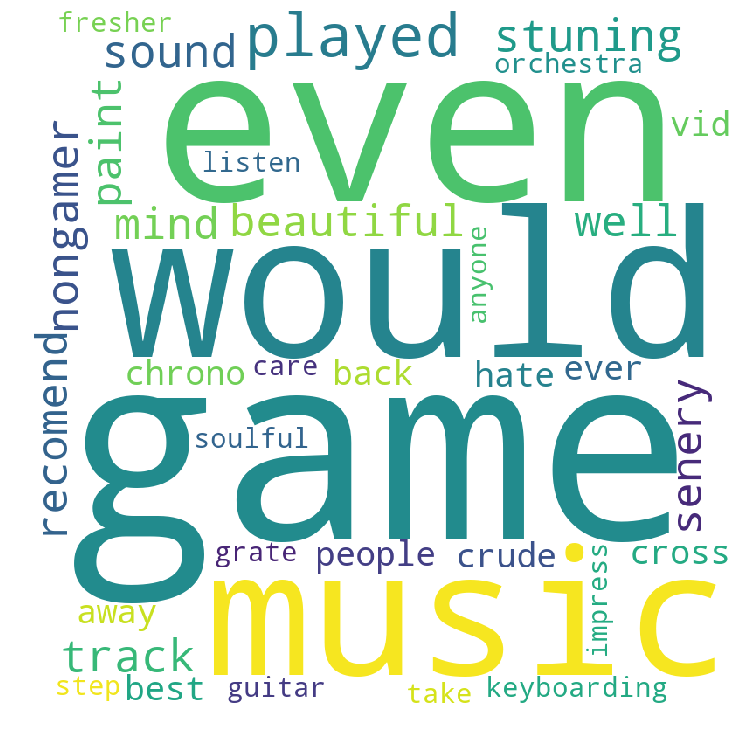

In [0]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# Deep Learning

## Recurrent Neural Networks (LSTM) 

## Importing Required Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import models, layers
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
import io 
from google.colab import files

In [4]:
uploaded = files.upload()

Saving amazonreviews.tsv to amazonreviews.tsv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['amazonreviews.tsv']),sep='\t')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


## Text Pre-processing with keras

In [0]:
le = LabelEncoder()

df.label = le.fit_transform(df.label)

In [13]:
df.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


## Tokenization

keras_token = Tokenizer(num_words=10000)
keras_token.fit_on_texts(df.review)

In [16]:
len(keras_token.word_index)

33469

## Text to Sequences

In [0]:
keras_result = keras_token.texts_to_sequences(df.review)

In [0]:
keras_pad_result = pad_sequences(keras_result, maxlen=500, padding='post')

In [20]:
keras_pad_result.shape

(10000, 500)

## Splitting Dataset to Train and test sets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(keras_pad_result, df.label.values, test_size=0.3, random_state=42, stratify=df.label.values)

In [23]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7000, 500) (3000, 500) (7000,) (3000,)


## Model Building

In [0]:
model = models.Sequential()

In [0]:
model.add(layers.Embedding(10000, 50, input_length=500)) #input_layer
model.add(layers.Conv1D(128, 8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool1D(3))
model.add(layers.Conv1D(256, 8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(layers.Bidirectional(layers.LSTM(256, dropout=0.2, recurrent_dropout=0.2)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid')) #output layer 

## Model Summary

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 50)           500000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 493, 128)          51328     
_________________________________________________________________
dropout_1 (Dropout)          (None, 493, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 164, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 157, 256)          262400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 157, 256)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 157, 256)         

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
es = EarlyStopping(monitor='accuracy', mode='max', patience=3)

## Model Fitting 

In [34]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test),callbacks=[es])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 74s 11ms/step - loss: 0.6782 - accuracy: 0.5490 - val_loss: 0.5312 - val_accuracy: 0.7390
Epoch 2/10
7000/7000 [==============================] - 65s 9ms/step - loss: 0.3678 - accuracy: 0.8420 - val_loss: 0.3813 - val_accuracy: 0.8393
Epoch 3/10
7000/7000 [==============================] - 65s 9ms/step - loss: 0.1588 - accuracy: 0.9443 - val_loss: 0.4271 - val_accuracy: 0.8387
Epoch 4/10
7000/7000 [==============================] - 67s 10ms/step - loss: 0.0733 - accuracy: 0.9786 - val_loss: 0.6877 - val_accuracy: 0.8367
Epoch 5/10
7000/7000 [==============================] - 67s 10ms/step - loss: 0.0461 - accuracy: 0.9850 - val_loss: 0.7730 - val_accuracy: 0.8217
Epoch 6/10
7000/7000 [==============================] - 66s 9ms/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.6837 - val_accuracy: 0.8287
Epoch 7/10
7000/7000 [==============================] - 67s 10ms/step - loss: 0

In [0]:
history = model.history.history

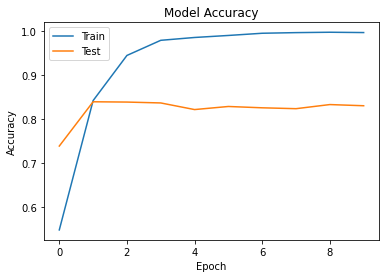

In [36]:
plt.plot(history['accuracy'],label='Accuracy')
plt.plot(history['val_accuracy'],label='Val_Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

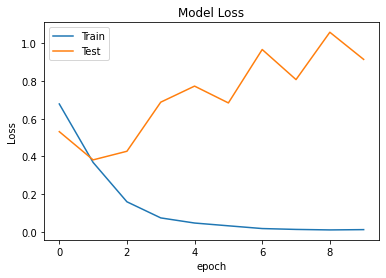

In [37]:
plt.plot(history['loss'],label='Loss')
plt.plot(history['val_loss'],label='Val_Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()